### Fist installing the required packages

In [1]:
pip install scikit-plot

In [2]:
pip install humanfriendly

     |████████████████████████████████| 86 kB 3.4 MB/s 


### **Reading Data**

In [3]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


# Read the experimental data with Pandas
infile = open('/content/drive/MyDrive/pid-5M.csv','r')
nRowsRead = 5000 # specify the number of rows to read and "none" for whole file
# pid-5M.csv has 5000000 rows, Here we are only loading the first "nRowsRead" rows

Pid_data = pd.read_csv(infile, delimiter=',', nrows = nRowsRead)

# To know the number of data points available
nRow, nCol = Pid_data.shape
print(f'There are {nRow} rows and {nCol} columns')

# X is the Features and y is the targets
X = Pid_data.drop(columns=['id'],axis = 1).values
y = Pid_data.id.values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

There are 5000 rows and 7 columns
(4000, 6)
(1000, 6)


### A Decision Tree Classifier 

Train set accuracy with Decision Tree: 0.94
Test set accuracy with Decision Tree: 0.94
Total execution time:  0.14 seconds


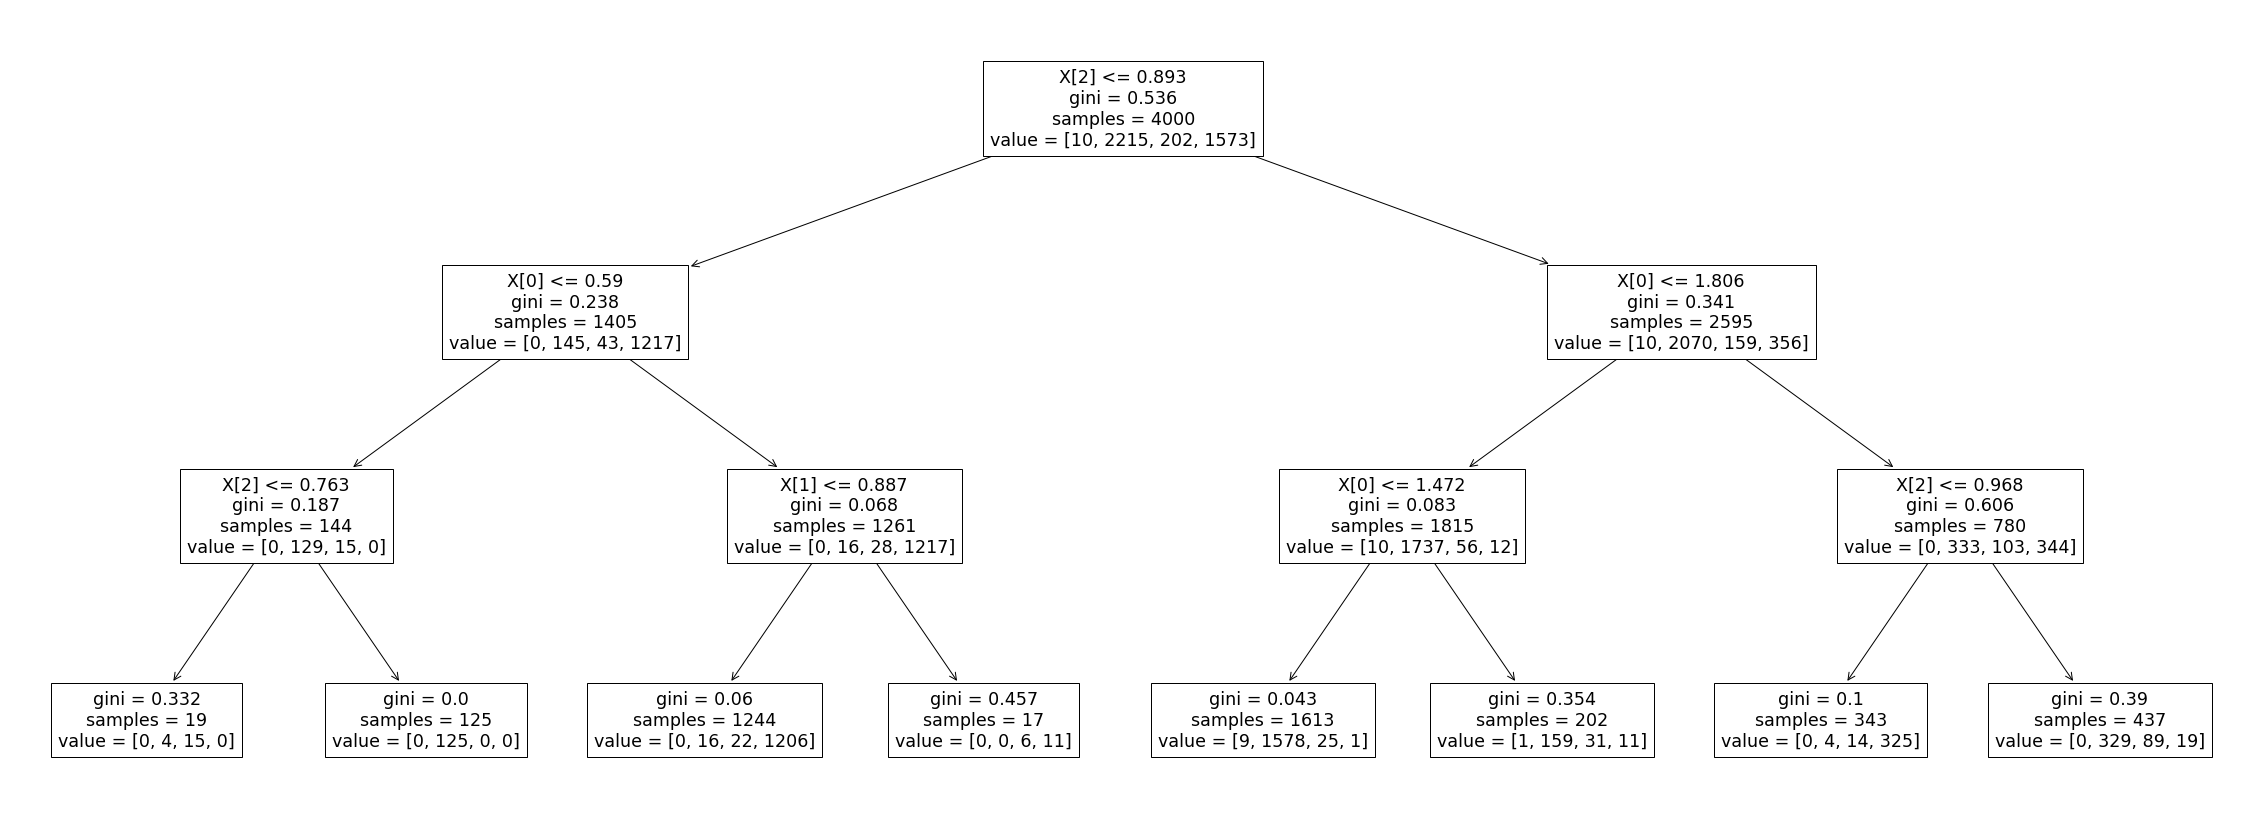

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from humanfriendly import format_timespan
import time

begin_time = time.time()

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)
print("Train set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Test set accuracy with Decision Tree: {:.2f}".format(tree_clf.score(X_test,y_test)))

plt.rcParams['figure.figsize'] = [40, 15]
tree.plot_tree(tree_clf)  #plot decision tree graph

end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))


### Comparing SVC, SVR, LogisticRegression, DecisionTreeClassifier

In [28]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from humanfriendly import format_timespan
import time

begin_time = time.time()


# comparing SVC, LogisticRegression, DecisionTreeClassifier

# Without scaling the data

# Decision Trees Classifier
tree_clf = DecisionTreeClassifier(max_depth=100, random_state=42)
tree_clf.fit(X_train, y_train)
print("Test set accuracy with Decision Tree Classifier: {:.2f}".format(tree_clf.score(X_test, y_test)))

# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=100, random_state=42)
tree_reg.fit(X_train, y_train)
print("Test set accuracy with Decision Tree Regressor: {:.2f}".format(tree_reg.score(X_test,y_test)))

# Support vector machine classifier
svm = SVC(gamma='auto', C=100, random_state = 42)
svm.fit(X_train, y_train)
print("Test set accuracy with SVM: {:.2f}".format(svm.score(X_test,y_test)))

# Support vector machine Regressor
svr = SVR(gamma='auto', C=100)
svr.fit(X_train, y_train)
print("Test set accuracy with SVR: {:.2f}".format(svr.score(X_test,y_test)))


# With scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Trees Classifier
tree_clf = DecisionTreeClassifier(max_depth=100, random_state=42)
tree_clf.fit(X_train_scaled, y_train)
print("Test set accuracy with Decision Tree Classifier with scaled data: {:.2f}".format(tree_clf.score(X_test_scaled, y_test)))

# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=100, random_state=42)
tree_reg.fit(X_train_scaled, y_train)
print("Test set accuracy with Decision Tree Regressor with scaled data: {:.2f}".format(tree_reg.score(X_test_scaled,y_test)))

# Support Vector Machine classifier
svm.fit(X_train_scaled, y_train)
print("Test set accuracy SVC with scaled data: {:.2f}".format(svm.score(X_test_scaled,y_test)))

# Support vector machine Regressor
svr = SVR(gamma='auto', C=100)
svr.fit(X_train_scaled, y_train)
print("Test set accuracy SVR with scaled data: {:.2f}".format(svr.score(X_test_scaled,y_test)))


end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

Test set accuracy with Decision Tree Classifier: 0.96
Test set accuracy with Decision Tree Regressor: 0.94
Test set accuracy with SVM: 0.94
Test set accuracy with SVR: 0.64
Test set accuracy with Decision Tree Classifier with scaled data: 0.96
Test set accuracy with Decision Tree Regressor with scaled data: 0.94
Test set accuracy SVC with scaled data: 0.96
Test set accuracy SVR with scaled data: 0.88
Total execution time:  5.46 seconds


## **Studying Trees Accuracies with Parameters variations**

### Functions definations

In [30]:
#Function for ploting different dependencies

def Accuracies_of_Classifies(X, y, Train_size= 0.8, Tree_depth=3, Random_state =1, Inverse_Regularization_para = 100):
    """ 
    Accuracies_of_Classifies: is a fuction that returns the accuracies of train, test for 
    Decision tree (DT) classifier, DT regression, Support Vector(SV) Classifier,
    SV regression without (the first 8) and with scaling (9 to 16)
    """
    # Decision TreesClassifier
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = Train_size, random_state = Random_state)
    
    
    # DecisionTreeRegressor
    tree_reg = DecisionTreeRegressor(max_depth=Tree_depth, random_state = Random_state)
    tree_reg.fit(X_train, y_train)
    Dec_T_Reg_train = tree_reg.score(X_train, y_train) # Train set accuracy with Decision Tree Regressor
    Dec_T_Reg_test = tree_reg.score(X_test,y_test) # Test set accuracy with Decision Tree Regressor
    
    # Decision Trees Classifier
    deep_tree_clf = DecisionTreeClassifier(max_depth = Tree_depth, random_state = Random_state)
    deep_tree_clf.fit(X_train, y_train)
    Dec_T_clas_train = deep_tree_clf.score(X_train, y_train) # Train set accuracy with Decision Tree Classifier
    Dec_T_clas_test = deep_tree_clf.score(X_test,y_test) # Test set accuracy with Decision Trees Classifier
    
    # Support vector machine Clasifier
    svm = SVC(gamma='auto', C=Inverse_Regularization_para, random_state = Random_state) # C: Regularization parameter; The strength of the regularization is inversely proportional to C.
    svm.fit(X_train, y_train)
    SVM_accu_train = svm.score(X_train, y_train) # Train set accuracy with SVM
    SVM_accu_test = svm.score(X_test,y_test) # Test set accuracy with SVM
    
    # Support vector machine Regression
    svr = SVR(gamma='auto', C=Inverse_Regularization_para) # C: Regularization parameter; The strength of the regularization is inversely proportional to C.
    svr.fit(X_train, y_train)
    SVR_accu_train = svr.score(X_train, y_train) # Train set accuracy with SVR
    SVR_accu_test = svr.score(X_test,y_test) # Test set accuracy with SVR
    
    #now scale the data
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # DecisionTreeRegressor
    tree_reg.fit(X_train_scaled, y_train)
    Dec_T_Reg_train_scaled = tree_reg.score(X_train_scaled,y_train) #Train set accuracy with Decision Tree Regressor with scaled data
    Dec_T_Reg_test_scaled = tree_reg.score(X_test_scaled,y_test) #Test set accuracy with Decision Tree Regressor with scaled data
    
    # Decision Trees
    deep_tree_clf.fit(X_train_scaled, y_train)
    Dec_T_clas_train_scaled = deep_tree_clf.score(X_train_scaled,y_train) # Train set accuracy with Decision Trees Classifier and scaled data
    Dec_T_clas_test_scaled = deep_tree_clf.score(X_test_scaled,y_test) # Test set accuracy with Decision Trees Classifier and scaled data
    
    # Support Vector Machine Classifier
    svm.fit(X_train_scaled, y_train)
    SVM_accu_train_scaled = svm.score(X_train_scaled,y_train) # Train set accuracy SVM with scaled data
    SVM_accu_test_scaled = svm.score(X_test_scaled,y_test) # Test set accuracy SVM with scaled data
    
    # Support Vector Machine Regression
    svr.fit(X_train_scaled, y_train)
    SVR_accu_train_scaled = svr.score(X_train_scaled,y_train) # Train set accuracy SVR with scaled data
    SVR_accu_test_scaled = svr.score(X_test_scaled,y_test) # Test set accuracy SVR with scaled data
    
    return Dec_T_Reg_train, Dec_T_Reg_test, Dec_T_clas_train, Dec_T_clas_test, SVM_accu_train, SVM_accu_test, SVR_accu_train, SVR_accu_test, Dec_T_Reg_train_scaled, Dec_T_Reg_test_scaled, Dec_T_clas_train_scaled, Dec_T_clas_test_scaled, SVM_accu_train_scaled, SVM_accu_test_scaled, SVR_accu_train_scaled, SVR_accu_test_scaled 



def Accuracies_With_Depth(X,y,Final_Tree_depth, Initial_Tree_depth=2):
    """
    Accuracies_With_Depth: Its a function that recieves data X, target y with the 
    number of final and Initial tree depth as Final_Tree_depth, Initial_Tree_depth
    respectively
    """
    Trees_depth, Accuracy_with_Depth = [],[]
    for Tre_depth in range(Initial_Tree_depth,Final_Tree_depth+1):
        Accuracy_with_Depth.append(Accuracies_of_Classifies(X, y, Train_size= 0.8, Tree_depth =Tre_depth, Random_state =1, Inverse_Regularization_para = 100))
        Trees_depth.append(Tre_depth)
    return Accuracy_with_Depth, Trees_depth


In [31]:
## test of functions behaviour

from humanfriendly import format_timespan
import time
begin_time = time.time()

ACC, Depth = Accuracies_With_Depth(X,y,4)
print(np.array(ACC).T[0])
print( Depth)

end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

[0.81495422 0.91157048 0.92511175]
[2, 3, 4]
Total execution time:  16.49 seconds


### Plots of Accuracies

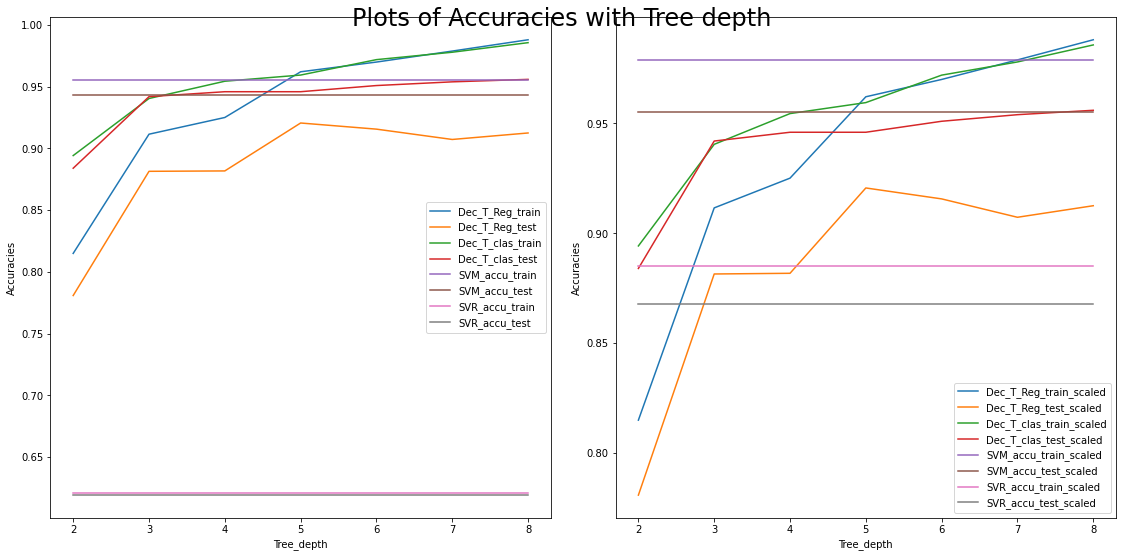

Total execution time:  44.51 seconds


In [32]:
title = ['Plots of Accuracies with Tree depth','Tree_depth','Accuracies']
def Plot_Accuracies(Accuracies_Variation_Data, Variable_x, title):
    """ 
    Plot_Accuracies: is a function that acceptes data and returns two plots
    of the data
    """
    Accuracies_0 = np.array(Accuracies_Variation_Data).T
    Legends = ['Dec_T_Reg_train', 'Dec_T_Reg_test', 'Dec_T_clas_train', 'Dec_T_clas_test', 'SVM_accu_train', 'SVM_accu_test', 'SVR_accu_train', 'SVR_accu_test', 'Dec_T_Reg_train_scaled', 'Dec_T_Reg_test_scaled', 'Dec_T_clas_train_scaled', 'Dec_T_clas_test_scaled', 'SVM_accu_train_scaled', 'SVM_accu_test_scaled', 'SVR_accu_train_scaled', 'SVR_accu_test_scaled']
    fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(16, 8)) # define the figure and subplots
    for i in range(2):
        for k in range(8):
            ax[i].plot(Variable_x, Accuracies_0[i*8 + k], label = Legends[i*8 + k])
        ax[i].legend()
        ax[i].set_xlabel(title[1])
        ax[i].set_ylabel(title[2])
    plt.rcParams['font.size'] = '20' # Set general font size
    plt.rcParams['figure.figsize'] = [40, 25]
    plt.suptitle(title[0])
    fig.tight_layout()
    plt.show()
        
import time
begin_time = time.time()

ACC, Depth = Accuracies_With_Depth(X,y,8)
Plot_Accuracies(ACC, Depth, title)

end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

### Functions definations for Accuracies with Random state & Regularization dependence

In [33]:
def Accuracies_With_RandomState(X,y,Final_Tree_RandomState, Initial_Tree_RandomState = 0, Tre_depth=6):
    """
    Accuracies_With_RandomState: Its a function that recieves data X, target y with the 
    number of final and Initial RandomState as Final_RandomState, Initial_RandomState
    respectively
    """
    Trees_RandomState, Accuracy_with_RandomState = [],[]
    for Tre_RandomState in range(Initial_Tree_RandomState,Final_Tree_RandomState+1):
        Accuracy_with_RandomState.append(Accuracies_of_Classifies(X, y, Train_size= 0.8, Tree_depth = Tre_depth, Random_state = Tre_RandomState, Inverse_Regularization_para = 100))
        Trees_RandomState.append(Tre_RandomState)
    return Accuracy_with_RandomState, Trees_RandomState


def Accuracies_With_Regularization_C(X,y,Regularization_C_factor, Regularization_C_multiplicity= 10, Tre_depth=6, Tre_RandomState = 10):
    """
    Accuracies_With_Regularization_C: Its a function that recieves data X, target y with the C (C = inverse regularization parameter)
    as the Regularization_C_factor * Regularization_C_multiplicity and returns the accuracies
    """
    Trees_Regularization_C, Accuracy_with_Regularization_C = [],[]
    for Tre_Regularization_C in range(1,Regularization_C_factor+1):
        Accuracy_with_Regularization_C.append(Accuracies_of_Classifies(X, y, Train_size= 0.8, Tree_depth = Tre_depth, Random_state = Tre_RandomState, Inverse_Regularization_para = Tre_Regularization_C*Regularization_C_multiplicity))
        Trees_Regularization_C.append(Tre_Regularization_C*Regularization_C_multiplicity)
    return Accuracy_with_Regularization_C, Trees_Regularization_C

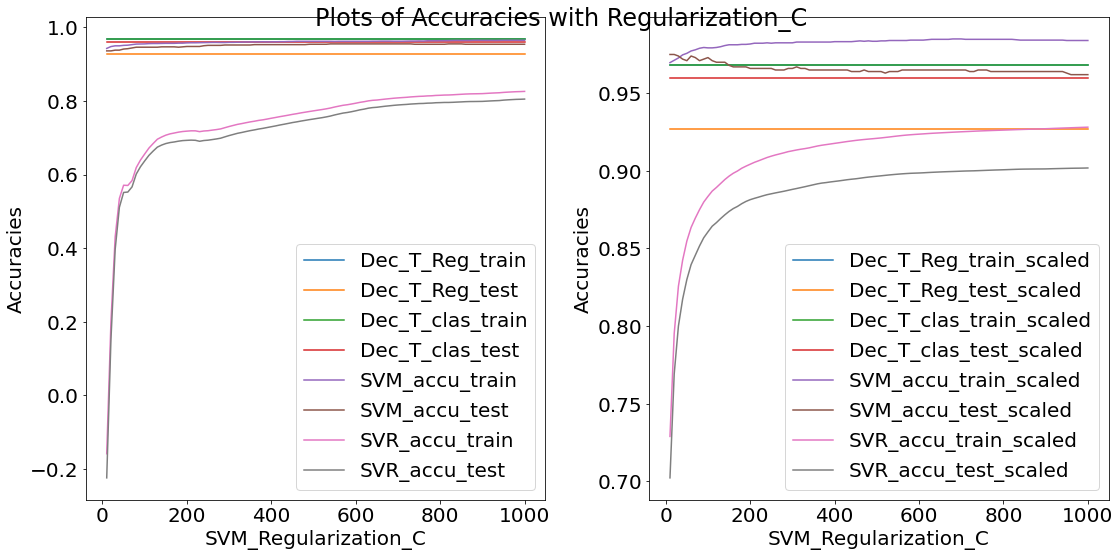

Total execution time:  10 minutes and 52.31 seconds


In [34]:
#title3 = ['Plots of Accuracies with Regularization_C','SVM_Regularization_C','Accuracies']
title3 = [' ','SVM_Regularization_C','Accuracies']
import time
begin_time = time.time()

ACC, Depth = Accuracies_With_Regularization_C(X,y,100)
Plot_Accuracies(ACC, Depth, title3)

end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

### Plot with Random States

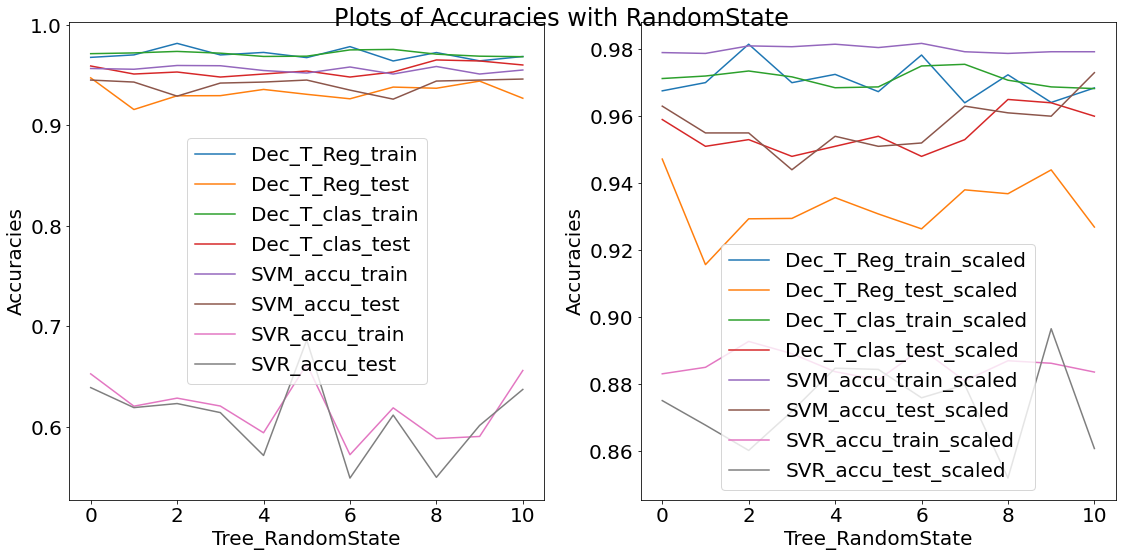

Total execution time:  59.11 seconds


In [35]:
#title2 = ['Plots of Accuracies with RandomState','Tree_RandomState','Accuracies']
title2 = ['','Tree_RandomState','Accuracies']

import time
begin_time = time.time()

ACC, Depth = Accuracies_With_RandomState(X,y,10)
Plot_Accuracies(ACC, Depth, title2)


end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

## Accuracies with Data Size Dependences

 The plot of Accuracies with 40 data size


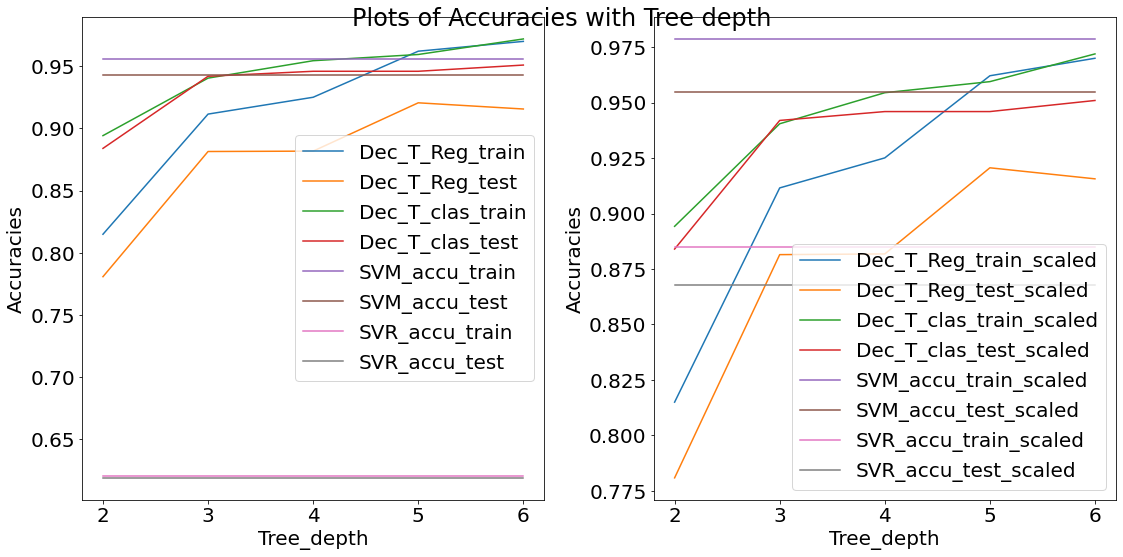

 The plot of Accuracies with 400 data size


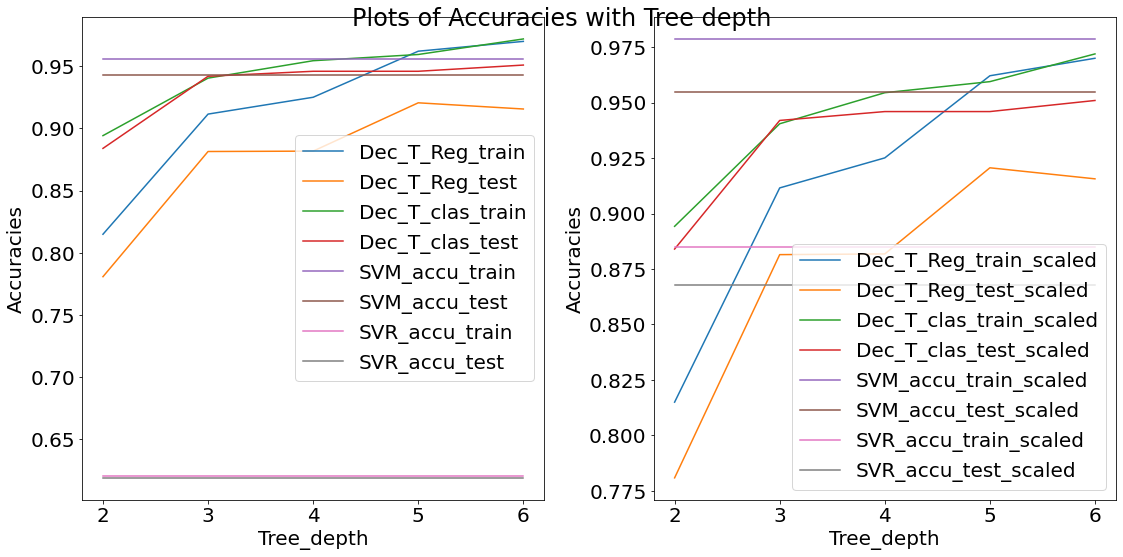

 The plot of Accuracies with 4000 data size


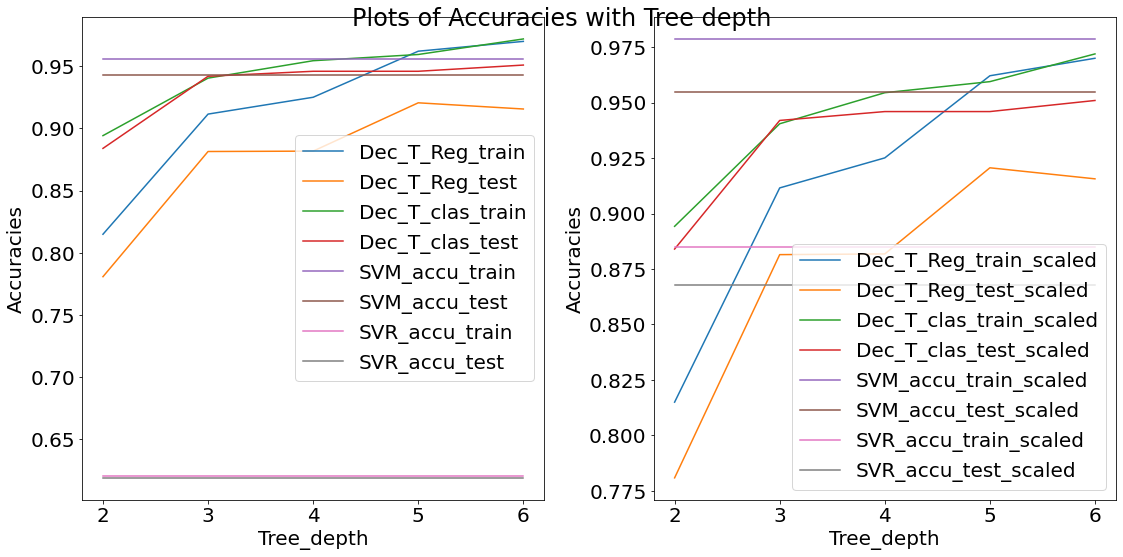

 The plot of Accuracies with 40000 data size


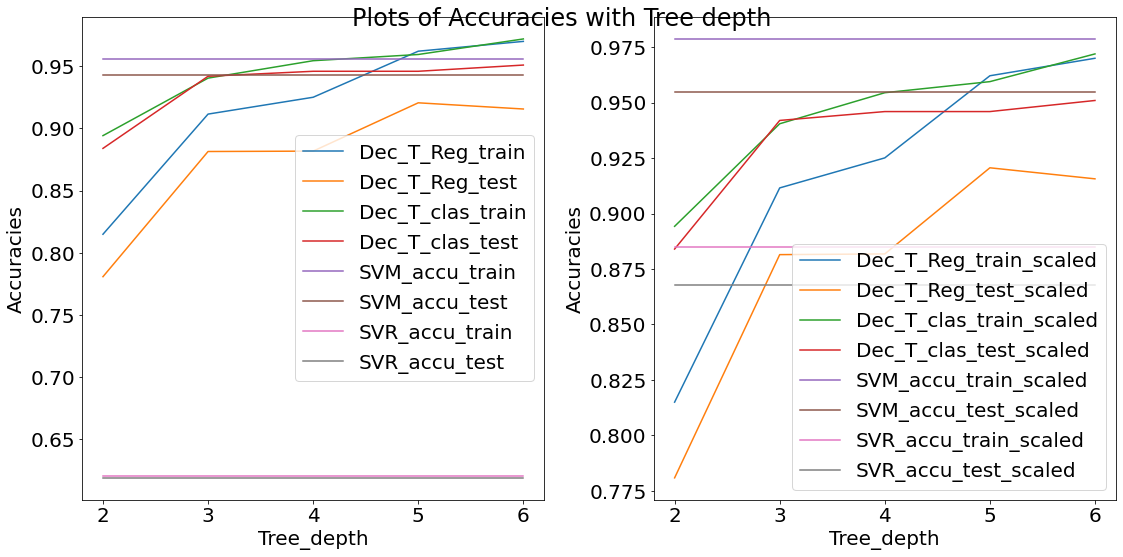

 The plot of Accuracies with 400000 data size


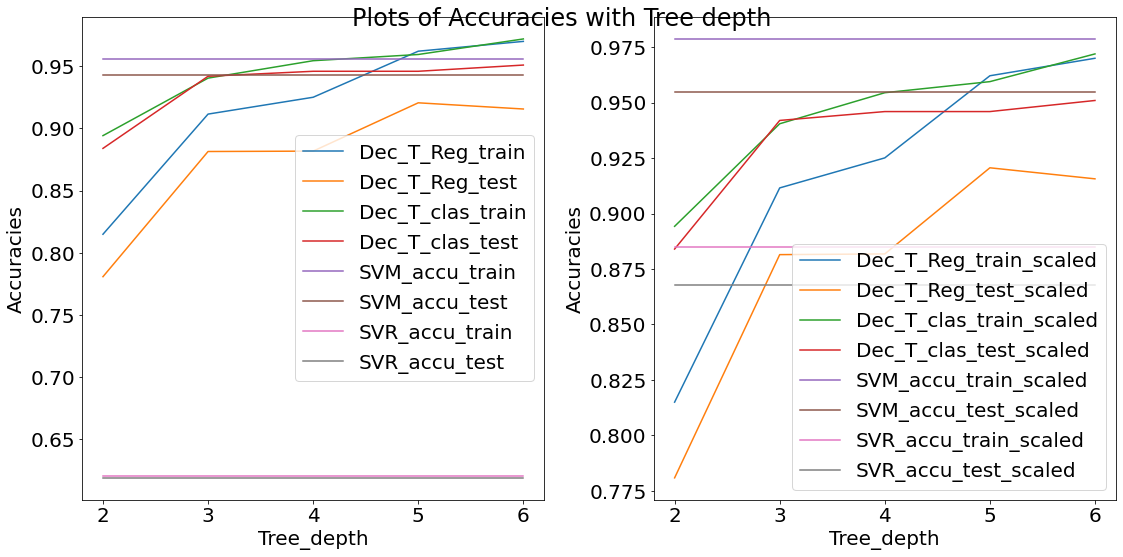

 The plot of Accuracies with 4000000 data size


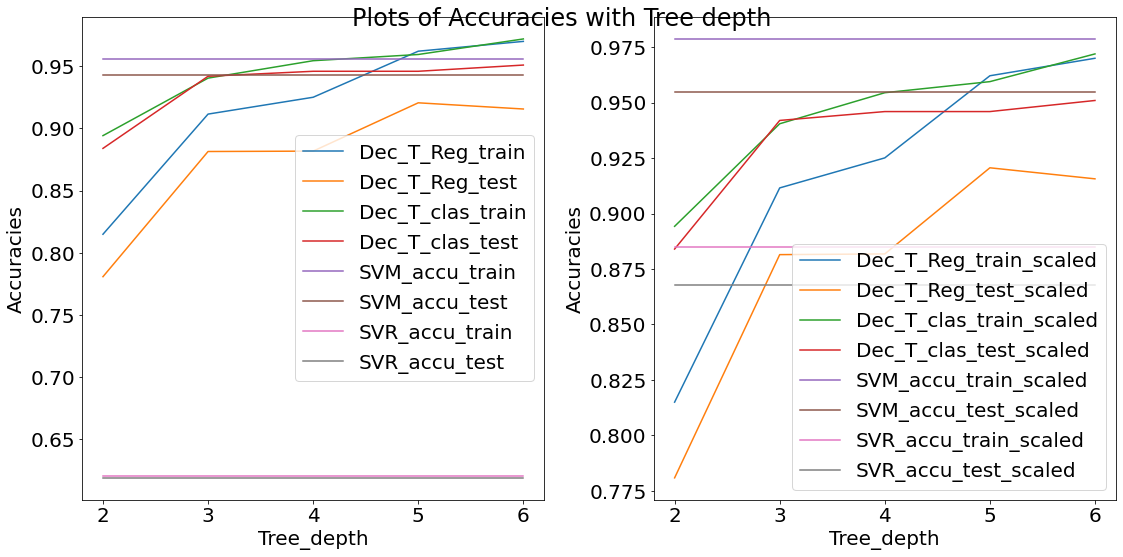

In [37]:

def Accuracies_With_Datasize(factor, X, y, f_type=0, multiplicity = 1):
    """ 
    Accuracies_With_Datasize: recieves factor(coefficients), X, y, 
    f_type (f_type = 0 for variation with Tree depth, f_type = 1 for variation 
    with Tree RandomState), and multiplicity = 1. It returns the plots of 
    accuracies as a function of tree depth, RandomState and Regularization.
    """
    j = [10,100,1000,10000,100000,1000000]
    function = [Accuracies_With_Depth(X,y,6), Accuracies_With_RandomState(X,y,10),Accuracies_With_Regularization_C(X,y,30)]
    #title_plot = [['Plots of Accuracies with Tree depth','Tree_depth','Accuracies'],['Plots of Accuracies with Tree RandomState','Tree_RandomState','Accuracies'],['Plots of Accuracies with Regularization_C','SVM_Regularization_C','Accuracies']]
    title_plot = [[' ','Tree_depth','Accuracies'],[' ','Tree_RandomState','Accuracies'],[' ','SVM_Regularization_C','Accuracies']]
    for t in range(len(j)):      
        nRowsRead = factor*j[t]*multiplicity # specify the number of rows (data) to read. none if want to read whole file
        print(f' The plot of Accuracies with {nRowsRead} data size')
        infile = open('/content/drive/MyDrive/pid-5M.csv','r')
        Pid_data = pd.read_csv(infile, delimiter=',', nrows = nRowsRead) # Read data
        # Features X and targets y
        X = Pid_data.drop(columns=['id'],axis = 1).values
        y = Pid_data.id.values
        ACC_Result, Variable_Test = function[f_type]
        Plot_Accuracies(ACC_Result, Variable_Test, title_plot[f_type])        
    return

# Load the data
#function = [Accuracies_With_Depth(X,y,6), Accuracies_With_RandomState(X,y,10)]
#title_plot = ['Plots of Accuracies with Tree depth','Tree_depth','Accuracies']
Accuracies_With_Datasize(4,X,y,0)


## **Ensemble Tree Methods**

### Voting Classifier

In [4]:
#Voting hard 'soft'
from humanfriendly import format_timespan
import time
begin_time = time.time()

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)



for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    

end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

LogisticRegression 0.92
RandomForestClassifier 0.964
SVC 0.909
VotingClassifier 0.934
LogisticRegression 0.92
RandomForestClassifier 0.964
SVC 0.909
VotingClassifier 0.946
Total execution time:  11.15 seconds


### Bagging on Trees & Random Forests

Test set accuracy with Bagging: 0.97
Train set accuracy with Bagging: 1.00
Test set accuracy with RandomForest: 0.96
Train set accuracy with RandomForest: 1.00
Random bagging


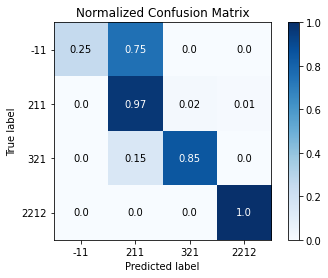

Random Forest


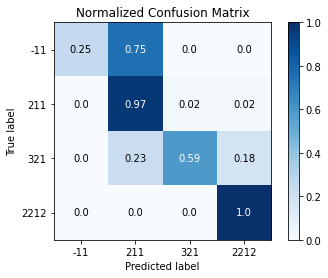

Total execution time:  17.48 seconds


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from humanfriendly import format_timespan
import time
begin_time = time.time()


bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

rnd_clf = RandomForestClassifier(n_estimators=500, criterion="entropy")
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)


np.sum(y_pred == y_pred_rf) / len(y_pred)

Bagging_test = bag_clf.score(X_test,y_test) # Test set accuracy with Decision Trees Classifier
Bagging_train = bag_clf.score(X_train, y_train) # Test set accuracy with Decision Trees Classifier
print("Test set accuracy with Bagging: {:.2f}".format(bag_clf.score(X_test,y_test)))
print("Train set accuracy with Bagging: {:.2f}".format(bag_clf.score(X_train, y_train)))


RandomForest_test = rnd_clf.score(X_test,y_test) # Test set accuracy with Decision Trees Classifier
RandomForest_train = rnd_clf.score(X_train, y_train) # Test set accuracy with Decision Trees Classifier
print("Test set accuracy with RandomForest: {:.2f}".format(rnd_clf.score(X_test,y_test)))
print("Train set accuracy with RandomForest: {:.2f}".format(rnd_clf.score(X_train, y_train)))
   

import scikitplot as skplt
print('Random bagging')
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

print('Random Forest')
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True)
plt.show()

end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

## AdaBoost Classifier

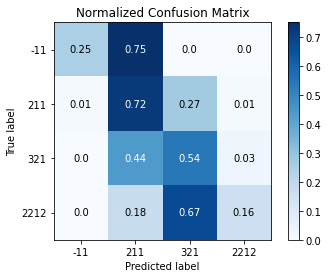

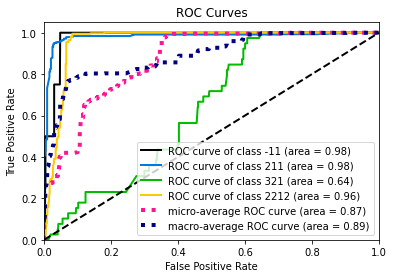

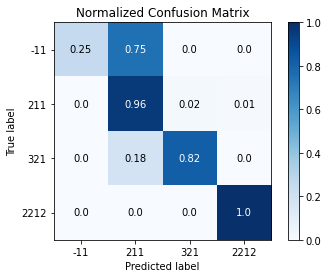

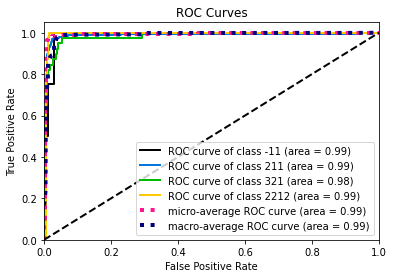

Total execution time:  10.48 seconds


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from humanfriendly import format_timespan
import time
begin_time = time.time()

#now scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


ada_clf_ns = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf_ns.fit(X_train, y_train)

y_pred = ada_clf_ns.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

y_probas = ada_clf_ns.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()


## different max_depth and n_estimators
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=6), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train_scaled, y_train)
y_pred = ada_clf.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

y_probas = ada_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()


end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

## Gradient Boost Method Regressor

Max depth: 400
Error: 66793789.00000006
Bias^2: 953193953.4369988
Var: 956426.144871005
66793789.00000006 >= 953193953.4369988 + 956426.144871005 = 954150379.5818698
Max depth: 401
Error: 58846287.000000045
Bias^2: 953084796.2850002
Var: 955059.8427750051
58846287.000000045 >= 953084796.2850002 + 955059.8427750051 = 954039856.1277752
Max depth: 402
Error: 51278505.00000005
Bias^2: 953328422.0370005
Var: 958093.086639005
51278505.00000005 >= 953328422.0370005 + 958093.086639005 = 954286515.1236396
Max depth: 403
Error: 58834187.000000045
Bias^2: 953193953.4370002
Var: 956426.1448710051
58834187.000000045 >= 953193953.4370002 + 956426.1448710051 = 954150379.5818712
Max depth: 404
Error: 58797887.000000045
Bias^2: 953204179.477
Var: 955926.992151005
58797887.000000045 >= 953204179.477 + 955926.992151005 = 954160106.469151
Max depth: 405
Error: 59666227.00000005
Bias^2: 953092308.4049999
Var: 954563.4039750049
59666227.00000005 >= 953092308.4049999 + 954563.4039750049 = 954046871.8089749


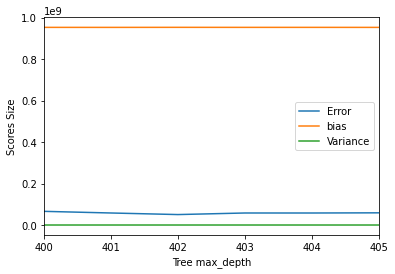

Total execution time:  1.8 seconds


In [10]:
from sklearn.ensemble import GradientBoostingRegressor
import scikitplot as skplt
from sklearn.metrics import mean_squared_error
from humanfriendly import format_timespan
import time
begin_time = time.time()


maxdegree = 406
init= 400

error,bias,variance,degree = [],[],[],[]
for t in range(init,maxdegree):
    model = GradientBoostingRegressor(max_depth=t, n_estimators=500, learning_rate=1.0)  
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    degree.append(t)
    error.append(np.mean( np.mean(np.dot((y_test - y_pred), (y_test - y_pred)))))
    bias.append(np.mean( np.dot((y_test - np.mean(y_pred)),(y_test - np.mean(y_pred)))))
    variance.append( np.mean( np.var(y_pred) ))
    print('Max depth:', t)
    print('Error:', error[t-init])
    print('Bias^2:', bias[t-init])
    print('Var:', variance[t-init])
    print('{} >= {} + {} = {}'.format(error[t-init], bias[t-init], variance[t-init], bias[t-init]+variance[t-init]))

plt.xlim(init,maxdegree-1)
plt.plot(degree, error, label='Error')
plt.plot(degree, bias, label='bias')
plt.plot(degree, variance, label='Variance')
plt.xlabel('Tree max_depth')
plt.ylabel('Scores Size')
plt.legend()

plt.show()


end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

### GradientBoosting With Classification

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


[0.99 0.94 0.94 0.95 0.97 0.94 0.95 0.87 0.96 0.95]
Test set accuracy with Random Forests and scaled data: 0.96


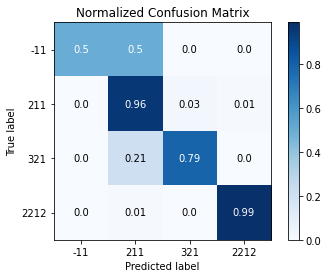

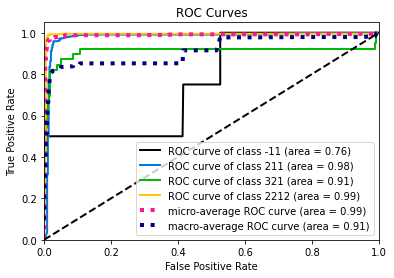

Total execution time:  12.71 seconds


In [4]:
import scikitplot as skplt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from humanfriendly import format_timespan
import time
begin_time = time.time()

#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

gd_clf = GradientBoostingClassifier(max_depth=6, n_estimators=100, learning_rate=1.0)  
gd_clf.fit(X_train_scaled, y_train)

#Cross validation
accuracy = cross_validate(gd_clf,X_test_scaled,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Random Forests and scaled data: {:.2f}".format(gd_clf.score(X_test_scaled,y_test)))

import scikitplot as skplt
y_pred = gd_clf.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

plt.show()
y_probas = gd_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)

plt.show()


end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

### XGBoost Regression Case

212165.1823103758
Max depth: 4
Error: 212165182.31037578
Bias^2: 953072619.8946586
Var: 857823.8
212165182.31037578 >= 953072619.8946586 + 857823.8125 = 953930443.7071586
223521.76650356967
Max depth: 5
Error: 223521766.50356966
Bias^2: 953265236.800112
Var: 883691.94
223521766.50356966 >= 953265236.800112 + 883691.9375 = 954148928.737612


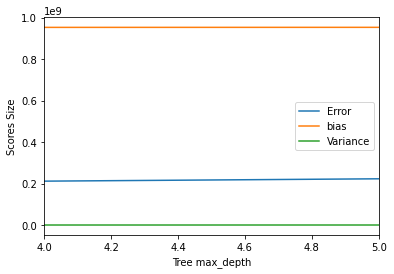

Total execution time:  1.5 seconds


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import scikitplot as skplt
from sklearn.metrics import mean_squared_error
from humanfriendly import format_timespan
import time
begin_time = time.time()


maxdegree = 6
init= 4

error,bias,variance,degree = [],[],[],[]
for t in range(init,maxdegree):
    model = xgb.XGBRegressor(objective ='reg:squarederror', colsaobjective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.9,max_depth = t, alpha = 10, n_estimators = 500)

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test, y_pred))
    #print(r2_score(y_test, y_pred))
    degree.append(t)
    error.append(np.mean( np.mean(np.dot((y_test - y_pred), (y_test - y_pred)))))
    bias.append(np.mean( np.dot((y_test - np.mean(y_pred)),(y_test - np.mean(y_pred)))))
    variance.append( np.mean( np.var(y_pred) ))
    print('Max depth:', t)
    print('Error:', error[t-init])
    print('Bias^2:', bias[t-init])
    print('Var:', variance[t-init])
    print('{} >= {} + {} = {}'.format(error[t-init], bias[t-init], variance[t-init], bias[t-init]+variance[t-init]))

plt.xlim(init,maxdegree-1)
plt.plot(degree, error, label='Error')
plt.plot(degree, bias, label='bias')
plt.plot(degree, variance, label='Variance')
plt.xlabel('Tree max_depth')
plt.ylabel('Scores Size')
plt.legend()
plt.show()


end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

## GradientBoostClassifier

Test set accuracy with Random Forests and scaled data: 0.97


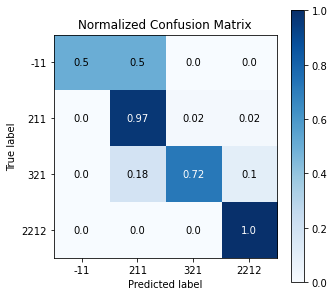

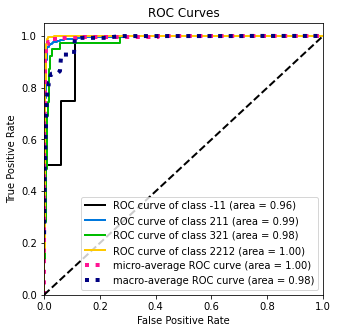

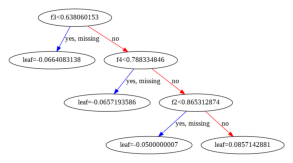

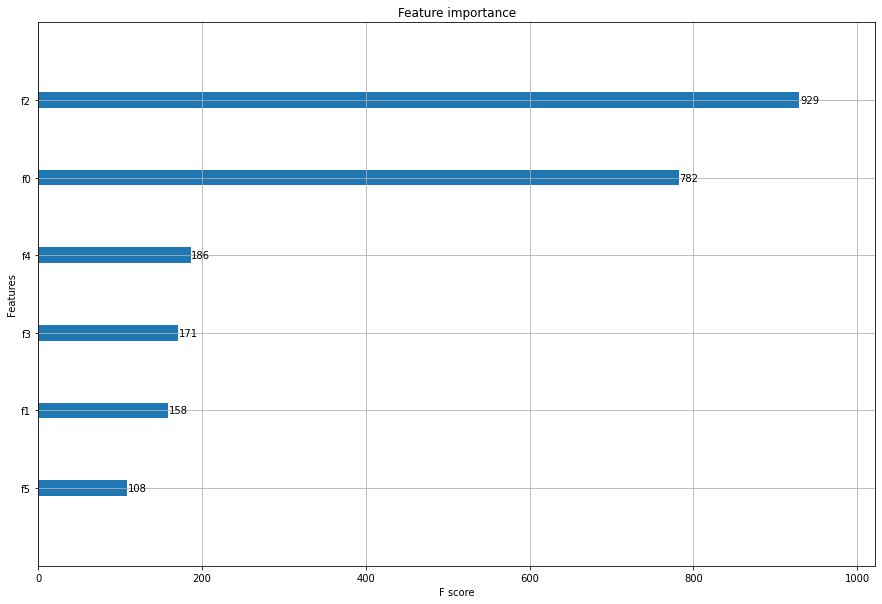

Total execution time:  1.63 seconds


In [23]:
from sklearn.model_selection import cross_validate
import scikitplot as skplt
import xgboost as xgb
from xgboost import plot_tree
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image 
from humanfriendly import format_timespan
import time
begin_time = time.time()
# Load the data

#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train_scaled,y_train)
print("Test set accuracy with Random Forests and scaled data: {:.2f}".format(xg_clf.score(X_test_scaled,y_test)))

import scikitplot as skplt
y_pred = xg_clf.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

y_probas = xg_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()



#xgb.plot_tree(xg_clf,num_trees=0)
xgb.plot_tree(xg_clf)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))

## Combining Many emsemble Methods

In [6]:
from sklearn.model_selection import cross_validate
import scikitplot as skplt
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from humanfriendly import format_timespan
import time
begin_time = time.time()

# Load the function


def Ensemble_Methods_variations(X,y, n_estimator=50, Random_state=5,Learning_rate=0.5):
  """
  Ensemble_Methods_variations: returns train score and test score
  for Voting classifier, Bagging, Adaboost, GradientBosting and XGbost methods.
  Without and with Scaling
  """  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

  ## Voting classifier

  log_clf = LogisticRegression(solver="liblinear", random_state=Random_state)
  rnd_clf = RandomForestClassifier(n_estimators=n_estimator, random_state=Random_state)
  svm_clf = SVC(gamma="auto", probability=True, random_state=Random_state)

  voting_clf = VotingClassifier(
      estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
      voting='hard')
  voting_clf.fit(X_train, y_train)
  for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_train = clf.predict(X_train)
  VotingClassifierscore_train = accuracy_score(y_train, y_pred_train)
  VotingClassifierscore_test = accuracy_score(y_test, y_pred)

  ## Bagging classifier

  #Instantiate the model with n_estimators trees and entropy as splitting criteria
  Random_Forest_model = RandomForestClassifier(n_estimators=n_estimator,criterion="entropy")
  Random_Forest_model.fit(X_train, y_train)
  RandomForestClassifierscore = Random_Forest_model.score(X_test,y_test)

  bag_clf = BaggingClassifier(
      DecisionTreeClassifier(splitter="random", random_state=Random_state),
      n_estimators = n_estimator, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=Random_state)

  bag_clf.fit(X_train, y_train)
  Bagging_test = bag_clf.score(X_test, y_test) # Test set accuracy with Decision Trees Classifier
  Bagging_train = bag_clf.score(X_train, y_train) # Test set accuracy with Decision Trees Classifier

  ## AdaBoostClassifier
  ada_clf_ns = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=1), n_estimators= n_estimator,
      algorithm="SAMME.R", learning_rate=Learning_rate, random_state=Random_state)
  ada_clf_ns.fit(X_train, y_train)
  AdaBoostClassifier_test = bag_clf.score(X_test,y_test) # Test set accuracy adaboost with Decision Trees Classifier
  AdaBoostClassifier_train = bag_clf.score(X_train, y_train) # Test set accuracy adaboost with Decision Trees Classifier

  ## GradientBoostingClassifier
  gd_clf = GradientBoostingClassifier(max_depth=3, n_estimators = n_estimator, learning_rate=Learning_rate, random_state=Random_state)  
  gd_clf.fit(X_train, y_train)
  GradientBoostingClassifier_accuracy_train = np.mean(cross_validate(gd_clf,X_train,y_train,cv=10)['test_score'])
  GradientBoostingClassifier_accuracy_test = np.mean(cross_validate(gd_clf,X_test,y_test,cv=10)['test_score'])
  GradientBoostingClassifier_score_train = gd_clf.score(X_train,y_train)
  GradientBoostingClassifier_score_test = gd_clf.score(X_test,y_test)

  ## XGBClassifier

  xg_clf = xgb.XGBClassifier(max_depth=3, n_estimators = n_estimator, learning_rate=Learning_rate, random_state=Random_state)
  xg_clf.fit(X_train,y_train)
  XGBClassifier_score_train = xg_clf.score(X_train,y_train)
  XGBClassifier_score_test = xg_clf.score(X_test,y_test)
  #print(XGBClassifier_score_train)

  ## With scaling of data
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)


  ## Voting classifier_scaled

  log_clf = LogisticRegression(solver="liblinear", random_state=Random_state)
  rnd_clf = RandomForestClassifier(n_estimators = n_estimator, random_state=Random_state)
  svm_clf = SVC(gamma="auto", probability=True, random_state=Random_state)

  voting_clf = VotingClassifier(
      estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
      voting='hard')
  voting_clf.fit(X_train_scaled, y_train)
  for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
      clf.fit(X_train_scaled, y_train)
      y_pred = clf.predict(X_test_scaled)
      y_pred_train = clf.predict(X_train_scaled)
  VotingClassifierscore_train_scaled = accuracy_score(y_train, y_pred_train)
  VotingClassifierscore_test_scaled = accuracy_score(y_test, y_pred)

  ## Bagging classifier_scaled

  #Instantiate the model with n_estimators trees and entropy as splitting criteria
  Random_Forest_model = RandomForestClassifier(n_estimators= n_estimator,criterion="entropy",random_state=Random_state )
  Random_Forest_model.fit(X_train_scaled, y_train)
  RandomForestClassifierscore = Random_Forest_model.score(X_test_scaled,y_test)

  bag_clf = BaggingClassifier(
      DecisionTreeClassifier(splitter="random", random_state=Random_state),
      n_estimators= n_estimator, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=Random_state)

  bag_clf.fit(X_train_scaled, y_train)
  Bagging_test_scaled = bag_clf.score(X_test_scaled,y_test) # Test set accuracy with Decision Trees Classifier
  Bagging_train_scaled = bag_clf.score(X_train_scaled, y_train) # Test set accuracy with Decision Trees Classifier

  ## AdaBoostClassifier_scaled
  ada_clf_ns = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=1), n_estimators = n_estimator,
      algorithm="SAMME.R", learning_rate=Learning_rate, random_state=Random_state)
  ada_clf_ns.fit(X_train_scaled, y_train)
  AdaBoostClassifier_test_scaled = bag_clf.score(X_test_scaled, y_test) # Test set accuracy adaboost with Decision Trees Classifier
  AdaBoostClassifier_train_scaled = bag_clf.score(X_train_scaled, y_train) # Test set accuracy adaboost with Decision Trees Classifier

  ## GradientBoostingClassifier_scaled
  gd_clf = GradientBoostingClassifier(max_depth=3, n_estimators = n_estimator, learning_rate=Learning_rate, random_state=Random_state)  
  gd_clf.fit(X_train_scaled, y_train)
  GradientBoostingClassifier_accuracy_train_scaled = np.mean(cross_validate(gd_clf,X_train_scaled,y_train,cv=10)['test_score'])
  GradientBoostingClassifier_accuracy_test_scaled = np.mean(cross_validate(gd_clf,X_test_scaled,y_test,cv=10)['test_score'])
  GradientBoostingClassifier_score_train_scaled = gd_clf.score(X_train_scaled,y_train)
  GradientBoostingClassifier_score_test_scaled = gd_clf.score(X_test_scaled,y_test)

  ## XGBClassifier_scaled

  xg_clf = xgb.XGBClassifier(max_depth=3, n_estimators = n_estimator, learning_rate=Learning_rate, random_state=Random_state)
  xg_clf.fit(X_train_scaled,y_train)
  XGBClassifier_score_train_scaled = xg_clf.score(X_train_scaled,y_train)
  XGBClassifier_score_test_scaled = xg_clf.score(X_test_scaled,y_test)
  #print(XGBClassifier_score_train_scaled)

  return VotingClassifierscore_train, VotingClassifierscore_test, Bagging_train, Bagging_test, AdaBoostClassifier_train, AdaBoostClassifier_test,\
  GradientBoostingClassifier_score_train,  GradientBoostingClassifier_score_test, XGBClassifier_score_train, XGBClassifier_score_test, \
  VotingClassifierscore_train_scaled, VotingClassifierscore_test_scaled, Bagging_train_scaled, Bagging_test_scaled, AdaBoostClassifier_train_scaled, AdaBoostClassifier_test_scaled,\
  GradientBoostingClassifier_score_train_scaled, GradientBoostingClassifier_score_test_scaled ,  XGBClassifier_score_train_scaled, XGBClassifier_score_test_scaled

## test of ensemble method
testr = Ensemble_Methods_variations(X,y)
print(testr)
## time taken calculation
end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


(0.926, 0.934, 0.99975, 0.969, 0.99975, 0.969, 0.93075, 0.892, 0.99375, 0.968, 0.9595, 0.957, 0.99975, 0.969, 0.99975, 0.969, 0.93075, 0.892, 0.99375, 0.968)
Total execution time:  1 minute and 6.08 seconds


## printing confusion matrix with best estimates for ensembles methods

Voting classifier confusion_matrix & ROC


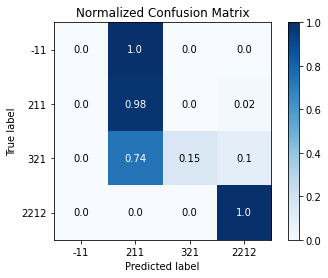

Bagging classifier confusion_matrix & ROC


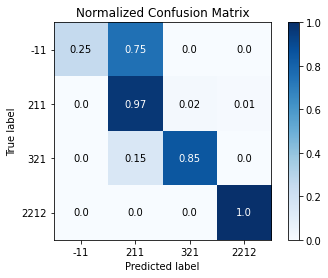

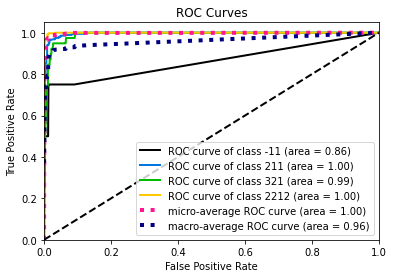

AdaBoost classifier confusion_matrix & ROC


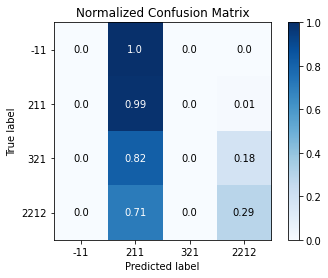

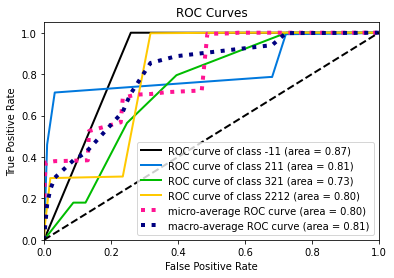

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


GradientBoosting classifier confusion_matrix & ROC


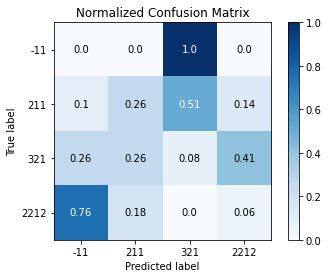

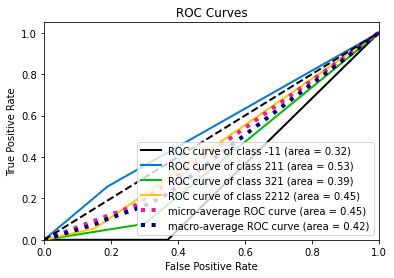

XGBoost classifier confusion_matrix & ROC


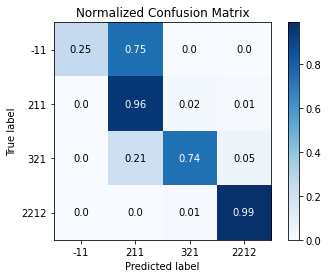

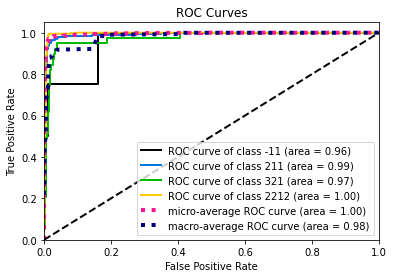

Voting classifier confusion_matrix & ROC


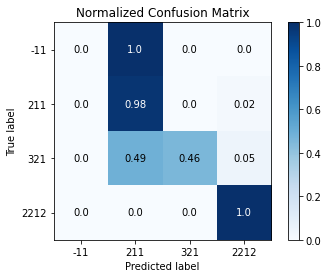

Bagging classifier confusion_matrix & ROC


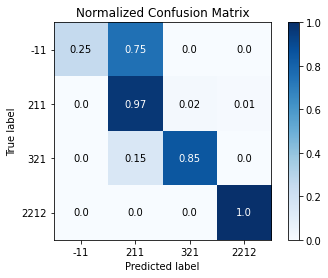

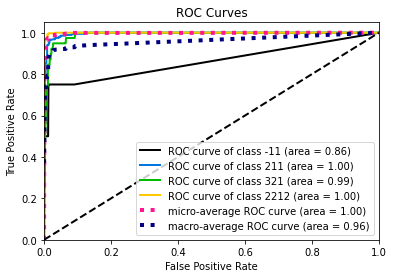

AdaBoost classifier confusion_matrix & ROC


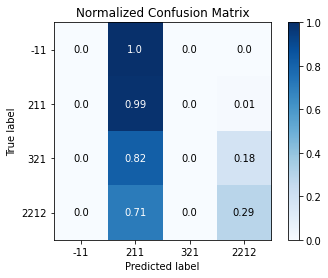

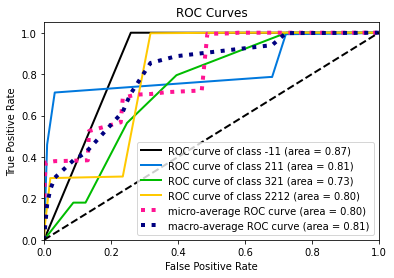

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


GradientBoosting classifier confusion_matrix & ROC


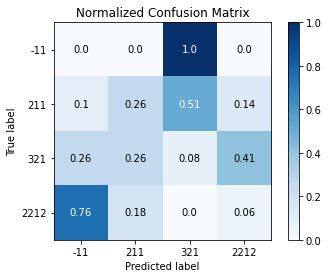

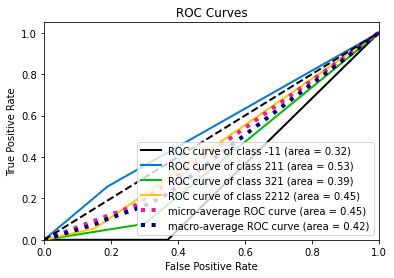

XGBoost classifier confusion_matrix & ROC


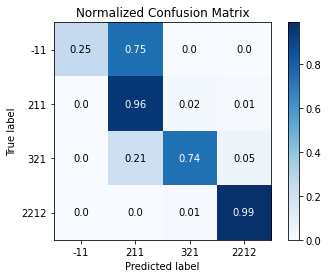

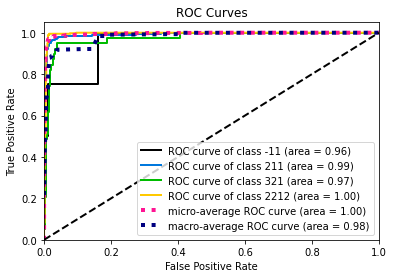

(0.95775, 0.95, 1.0, 0.971, 1.0, 0.971, 0.16675, 0.169, 1.0, 0.963, 0.96925, 0.964, 1.0, 0.971, 1.0, 0.971, 0.16675, 0.169, 1.0, 0.963)
Total execution time:  18 minutes and 17.96 seconds


In [7]:
## printing confusion matrix with best estimates

def Ensemble_Methods_Best_para_plot(X,y, n_estimator=50, Random_state=5,Learning_rate=0.5):
  """  
  Ensemble_Methods_Best_para_plot: returns train score, test score, confusion matrix 
  and ROC plot for Voting classifier, Bagging, Adaboost, GradientBosting and XGbost methods 
  Without and with Scaling
  """  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

  ## Voting classifier

  log_clf = LogisticRegression(solver="liblinear", random_state=Random_state)
  rnd_clf = RandomForestClassifier(n_estimators=n_estimator, random_state=Random_state)
  svm_clf = SVC(gamma="auto", probability=True, random_state=Random_state)

  voting_clf = VotingClassifier(
      estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
      voting='soft')
  voting_clf.fit(X_train, y_train)
  for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      y_pred_train = clf.predict(X_train)
  VotingClassifierscore_train = accuracy_score(y_train, y_pred_train)
  VotingClassifierscore_test = accuracy_score(y_test, y_pred)

  print("Voting classifier confusion_matrix & ROC")
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  #y_probas = voting_clf.predict_proba(X_test)
  #skplt.metrics.plot_roc(y_test, y_probas)
  #plt.show()

  ## Bagging classifier
  #Instantiate the model with n_estimators trees and entropy as splitting criteria
  Random_Forest_model = RandomForestClassifier(n_estimators=n_estimator,criterion="entropy")
  Random_Forest_model.fit(X_train, y_train)
  RandomForestClassifierscore = Random_Forest_model.score(X_test,y_test)

  bag_clf = BaggingClassifier(
      DecisionTreeClassifier(splitter="random", random_state=Random_state),
      n_estimators = n_estimator, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=Random_state)
  #bag_clf = BaggingClassifier()
  bag_clf.fit(X_train, y_train)
  Bagging_test = bag_clf.score(X_test, y_test) # Test set accuracy with Decision Trees Classifier
  Bagging_train = bag_clf.score(X_train, y_train) # Test set accuracy with Decision Trees Classifier
  print("Bagging classifier confusion_matrix & ROC")
  y_pred = bag_clf.predict(X_test)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  y_probas = bag_clf.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)
  plt.show()

  ## AdaBoostClassifier
  ada_clf_ns = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=1), n_estimators= n_estimator,
      algorithm="SAMME.R", learning_rate=Learning_rate, random_state=Random_state)
  #ada_clf_ns = AdaBoostClassifier()
  ada_clf_ns.fit(X_train, y_train)
  AdaBoostClassifier_test = bag_clf.score(X_test,y_test) # Test set accuracy adaboost with Decision Trees Classifier
  AdaBoostClassifier_train = bag_clf.score(X_train, y_train) # Test set accuracy adaboost with Decision Trees Classifier
  print("AdaBoost classifier confusion_matrix & ROC")
  y_pred = ada_clf_ns.predict(X_test)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  y_probas = ada_clf_ns.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)
  plt.show()

  ## GradientBoostingClassifier
  gd_clf = GradientBoostingClassifier(max_depth=3, n_estimators = n_estimator, learning_rate=Learning_rate, random_state=Random_state)  
  #gd_clf = GradientBoostingClassifier()
  gd_clf.fit(X_train, y_train)
  GradientBoostingClassifier_accuracy_train = np.mean(cross_validate(gd_clf,X_train,y_train,cv=10)['test_score'])
  GradientBoostingClassifier_accuracy_test = np.mean(cross_validate(gd_clf,X_test,y_test,cv=10)['test_score'])
  GradientBoostingClassifier_score_train = gd_clf.score(X_train,y_train)
  GradientBoostingClassifier_score_test = gd_clf.score(X_test,y_test)
  print("GradientBoosting classifier confusion_matrix & ROC")
  y_pred = gd_clf.predict(X_test)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  y_probas = gd_clf.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)
  plt.show()


  ## XGBClassifier
  xg_clf = xgb.XGBClassifier(max_depth=3, n_estimators = n_estimator, learning_rate=Learning_rate, random_state=Random_state)
  #xg_clf = xgb.XGBClassifier()
  xg_clf.fit(X_train,y_train)
  XGBClassifier_score_train = xg_clf.score(X_train,y_train)
  XGBClassifier_score_test = xg_clf.score(X_test,y_test)
  print("XGBoost classifier confusion_matrix & ROC")
  y_pred = xg_clf.predict(X_test)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  y_probas = xg_clf.predict_proba(X_test)
  skplt.metrics.plot_roc(y_test, y_probas)
  plt.show()

  ## With scaling of data
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)


  ## Voting classifier_scaled
  log_clf = LogisticRegression(solver="liblinear", random_state=Random_state)
  rnd_clf = RandomForestClassifier(n_estimators = n_estimator, random_state=Random_state)
  svm_clf = SVC(gamma="auto", probability=True, random_state=Random_state)

  voting_clf = VotingClassifier(
      estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
      voting='soft')
  voting_clf.fit(X_train_scaled, y_train)
  for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
      clf.fit(X_train_scaled, y_train)
      y_pred = clf.predict(X_test_scaled)
      y_pred_train = clf.predict(X_train_scaled)
  VotingClassifierscore_train_scaled = accuracy_score(y_train, y_pred_train)
  VotingClassifierscore_test_scaled = accuracy_score(y_test, y_pred)
  print("Voting classifier confusion_matrix & ROC")
  y_pred = voting_clf.predict(X_test_scaled)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  #y_probas = voting_clf.predict_proba(X_test_scaled)
  #skplt.metrics.plot_roc(y_test, y_probas)
  #plt.show()

  ## Bagging classifier_scaled
  #Instantiate the model with n_estimators trees and entropy as splitting criteria
  Random_Forest_model = RandomForestClassifier(n_estimators= n_estimator,criterion="entropy",random_state=Random_state )
  Random_Forest_model.fit(X_train_scaled, y_train)
  RandomForestClassifierscore = Random_Forest_model.score(X_test_scaled,y_test)

  bag_clf = BaggingClassifier(
      DecisionTreeClassifier(splitter="random", random_state=Random_state),
      n_estimators= n_estimator, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=Random_state)
  #bag_clf = BaggingClassifier()
  bag_clf.fit(X_train_scaled, y_train)
  Bagging_test_scaled = bag_clf.score(X_test_scaled,y_test) # Test set accuracy with Decision Trees Classifier
  Bagging_train_scaled = bag_clf.score(X_train_scaled, y_train) # Test set accuracy with Decision Trees Classifier
  print("Bagging classifier confusion_matrix & ROC")
  y_pred = bag_clf.predict(X_test_scaled)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  y_probas = bag_clf.predict_proba(X_test_scaled)
  skplt.metrics.plot_roc(y_test, y_probas)
  plt.show()

  ## AdaBoostClassifier_scaled
  ada_clf_ns = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=1), n_estimators = n_estimator,
      algorithm="SAMME.R", learning_rate=Learning_rate, random_state=Random_state)
  #ada_clf_ns = AdaBoostClassifier()
  ada_clf_ns.fit(X_train_scaled, y_train)
  AdaBoostClassifier_test_scaled = bag_clf.score(X_test_scaled, y_test) # Test set accuracy adaboost with Decision Trees Classifier
  AdaBoostClassifier_train_scaled = bag_clf.score(X_train_scaled, y_train) # Test set accuracy adaboost with Decision Trees Classifier
  print("AdaBoost classifier confusion_matrix & ROC")
  y_pred = ada_clf_ns.predict(X_test_scaled)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  y_probas = ada_clf_ns.predict_proba(X_test_scaled)
  skplt.metrics.plot_roc(y_test, y_probas)
  plt.show()
  

  ## GradientBoostingClassifier_scaled
  gd_clf = GradientBoostingClassifier(max_depth=3, n_estimators = n_estimator, learning_rate=Learning_rate, random_state=Random_state)  
  #gd_clf = GradientBoostingClassifier()  
  gd_clf.fit(X_train_scaled, y_train)
  GradientBoostingClassifier_accuracy_train_scaled = np.mean(cross_validate(gd_clf,X_train_scaled,y_train,cv=10)['test_score'])
  GradientBoostingClassifier_accuracy_test_scaled = np.mean(cross_validate(gd_clf,X_test_scaled,y_test,cv=10)['test_score'])
  GradientBoostingClassifier_score_train_scaled = gd_clf.score(X_train_scaled,y_train)
  GradientBoostingClassifier_score_test_scaled = gd_clf.score(X_test_scaled,y_test)
  print("GradientBoosting classifier confusion_matrix & ROC")
  y_pred = gd_clf.predict(X_test_scaled)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  y_probas = gd_clf.predict_proba(X_test_scaled)
  skplt.metrics.plot_roc(y_test, y_probas)
  plt.show()

  ## XGBClassifier_scaled
  xg_clf = xgb.XGBClassifier(max_depth=3, n_estimators = n_estimator, learning_rate=Learning_rate, random_state=Random_state)
  #xg_clf = xgb.XGBClassifier()
  xg_clf.fit(X_train_scaled,y_train)
  XGBClassifier_score_train_scaled = xg_clf.score(X_train_scaled,y_train)
  XGBClassifier_score_test_scaled = xg_clf.score(X_test_scaled,y_test)
  print("XGBoost classifier confusion_matrix & ROC")
  y_pred = xg_clf.predict(X_test_scaled)
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
  plt.show()
  y_probas = xg_clf.predict_proba(X_test_scaled)
  skplt.metrics.plot_roc(y_test, y_probas)
  plt.show()

  return VotingClassifierscore_train, VotingClassifierscore_test, Bagging_train, Bagging_test, AdaBoostClassifier_train, AdaBoostClassifier_test,\
  GradientBoostingClassifier_score_train,  GradientBoostingClassifier_score_test, XGBClassifier_score_train, XGBClassifier_score_test, \
  VotingClassifierscore_train_scaled, VotingClassifierscore_test_scaled, Bagging_train_scaled, Bagging_test_scaled, AdaBoostClassifier_train_scaled, AdaBoostClassifier_test_scaled,\
  GradientBoostingClassifier_score_train_scaled, GradientBoostingClassifier_score_test_scaled ,  XGBClassifier_score_train_scaled, XGBClassifier_score_test_scaled

## test of ensemble method
test0 = Ensemble_Methods_Best_para_plot(X,y, n_estimator=500, Random_state=42,Learning_rate=1.0)
print(test0)
## time taken calculation
end_time = time.time() - begin_time
print("Total execution time: ", format_timespan(end_time))


## Ensemble Methods Accuracies With n_estimator, Random_states & Learning_rate

In [8]:
def Ensemble_Methods_Accuracies_With_n_estimator(X,y,Final_n_estimator, Initial_n_estimator=1,Random_states=5, Learning_rates = 0.5):
    """
    Ensemble_Methods_Accuracies_With_n_estimator: Its a function that recieves data X, target y with the 
    number of final and Initial tree n_estimator as Final_n_estimator, Initial_n_estimator
    respectively
    """
    N_estimator, Accuracy_With_n_estimator = [],[]
    for N_estimators in range(Initial_n_estimator,Final_n_estimator+1):
      Accuracy_With_n_estimator.append(Ensemble_Methods_variations(X,y, n_estimator = N_estimators*50, Random_state = Random_states, Learning_rate = Learning_rates))
      #Accuracy_With_n_estimator.append(Ensemble_Methods_variations(X,y, n_estimator=50))
      N_estimator.append(N_estimators)
    return Accuracy_With_n_estimator, N_estimator


def Ensemble_Methods_Accuracies_With_Random_states(X,y,Final_Random_state, Initial_Random_state=2, N_estimators = 100, Learning_rates =0.5):
    """
    Accuracies_With_Random_state: Its a function that recieves data X, target y with the 
    number of final and Initial Random_state as Final_Random_state, Initial_Random_state
    respectively
    """
    N_Random_state, Accuracy_With_Random_states = [],[]
    for N_Random_states in range(Initial_Random_state,Final_Random_state+1):
      Accuracy_With_Random_states.append(Ensemble_Methods_variations(X,y, n_estimator = N_estimators, Random_state = N_Random_states,Learning_rate = Learning_rates))
      N_Random_state.append(N_Random_states)
    return Accuracy_With_Random_states, N_Random_state


def Ensemble_Methods_Accuracies_With_Learning_rate(X,y,Final_Learning_rate, Initial_Learning_rate=2, Random_states=5,N_estimators=100):
    """
    Accuracies_With_Learning_rate: Its a function that recieves data X, target y with the 
    number of final and Initial Learning_rate as Final_Learning_rate, Initial_Learning_rate
    respectively
    """
    N_Learning_rate, Accuracy_With_Learning_rate = [],[]
    for N_Learning_rates in range(Initial_Learning_rate,Final_Learning_rate+1):
      Accuracy_With_Learning_rate.append(Ensemble_Methods_variations(X,y, n_estimator = N_estimators, Random_state=Random_states, Learning_rate = 0.1*N_Learning_rates))
      N_Learning_rate.append(N_Learning_rates)
    return Accuracy_With_Learning_rate, N_Learning_rate

tr1,tr2 = Ensemble_Methods_Accuracies_With_n_estimator(X,y,10)
tr3,tr4 =  Ensemble_Methods_Accuracies_With_Random_states(X,y,12,0)
tr5,tr6 = Ensemble_Methods_Accuracies_With_Learning_rate(X,y,10)
#Ensemble_Methods_variations(X,y, n_estimator=50, Random_state=5,Learning_rate=0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

In [13]:
print(tr1)
print(tr2)
print(tr3)
print(tr4)
print(tr5)
print(tr6)

[(0.926, 0.934, 0.99975, 0.969, 0.99975, 0.969, 0.93075, 0.892, 0.99375, 0.968, 0.9595, 0.957, 0.99975, 0.969, 0.99975, 0.969, 0.93075, 0.892, 0.99375, 0.968), (0.926, 0.934, 1.0, 0.971, 1.0, 0.971, 0.932, 0.891, 1.0, 0.966, 0.9595, 0.955, 1.0, 0.971, 1.0, 0.971, 0.932, 0.891, 1.0, 0.966), (0.926, 0.934, 1.0, 0.969, 1.0, 0.969, 0.93225, 0.891, 1.0, 0.966, 0.9595, 0.958, 1.0, 0.969, 1.0, 0.969, 0.93225, 0.891, 1.0, 0.966), (0.926, 0.934, 1.0, 0.969, 1.0, 0.969, 0.93275, 0.891, 1.0, 0.965, 0.9595, 0.957, 1.0, 0.969, 1.0, 0.969, 0.93275, 0.891, 1.0, 0.965), (0.926, 0.934, 1.0, 0.969, 1.0, 0.969, 0.945, 0.898, 1.0, 0.967, 0.9595, 0.958, 1.0, 0.97, 1.0, 0.97, 0.945, 0.898, 1.0, 0.967), (0.926, 0.934, 1.0, 0.97, 1.0, 0.97, 0.945, 0.896, 1.0, 0.965, 0.9595, 0.958, 1.0, 0.97, 1.0, 0.97, 0.945, 0.896, 1.0, 0.965), (0.926, 0.934, 1.0, 0.969, 1.0, 0.969, 0.945, 0.898, 1.0, 0.965, 0.9595, 0.958, 1.0, 0.969, 1.0, 0.969, 0.945, 0.898, 1.0, 0.965), (0.926, 0.934, 1.0, 0.969, 1.0, 0.969, 0.945, 0.898,

## Plot of Ensemble Accuracies with n_estimators, Random_states & Learning_rate

Plots of Accuracies With_n_estimator


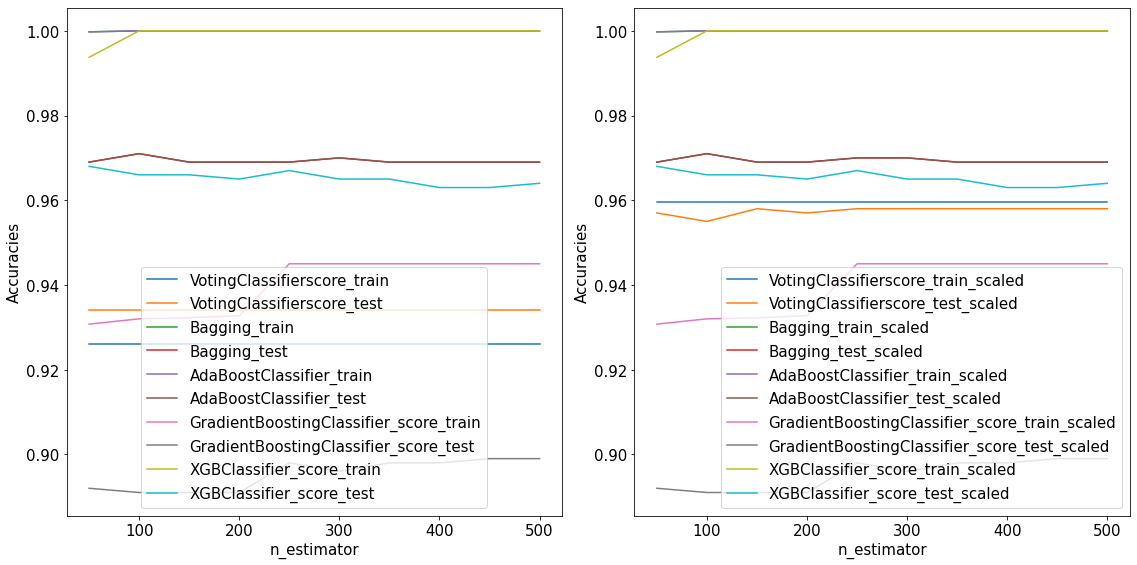

Plots of Accuracies With Random_states


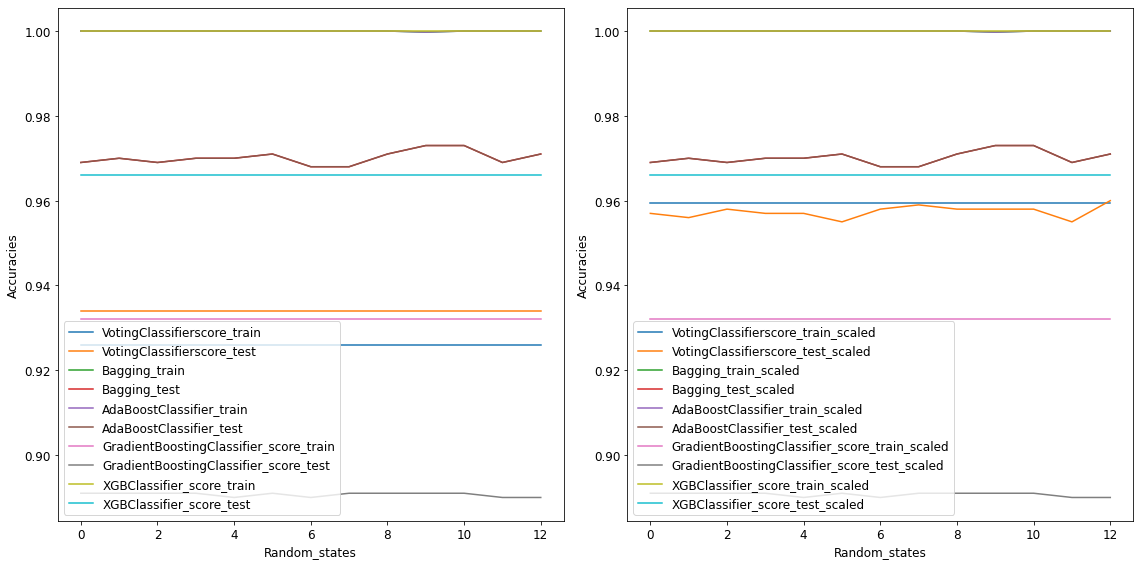

Plots of Accuracies With Learning_rate


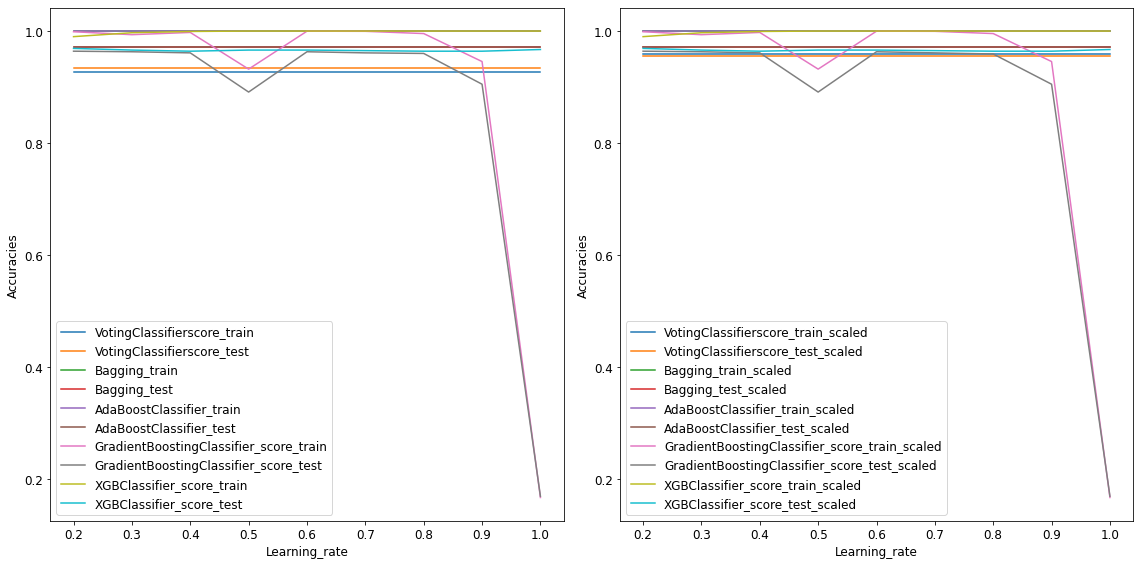

In [24]:
def Plot_Accuracies_Ensemble(Accuracies_Variation_Data, Variable_x, title):
    """ 
    Plot_Accuracies_Ensemble: is a function that acceptes data and returns two plots
    of the data
    """
    Accuracies_0 = np.array(Accuracies_Variation_Data).T
    Legends = ["VotingClassifierscore_train", "VotingClassifierscore_test", "Bagging_train", "Bagging_test", "AdaBoostClassifier_train", "AdaBoostClassifier_test",\
  "GradientBoostingClassifier_score_train",  "GradientBoostingClassifier_score_test", "XGBClassifier_score_train", "XGBClassifier_score_test", \
  "VotingClassifierscore_train_scaled", "VotingClassifierscore_test_scaled", "Bagging_train_scaled", "Bagging_test_scaled", "AdaBoostClassifier_train_scaled", "AdaBoostClassifier_test_scaled",\
  "GradientBoostingClassifier_score_train_scaled", "GradientBoostingClassifier_score_test_scaled" ,  "XGBClassifier_score_train_scaled", "XGBClassifier_score_test_scaled" ]
    fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(16, 8)) # define the figure and subplots
    for i in range(2):
        for k in range(10):
            ax[i].plot(Variable_x, Accuracies_0[i*10 + k], label = Legends[i*10 + k])
        ax[i].legend()
        ax[i].set_xlabel(title[1])
        ax[i].set_ylabel(title[2])
        #ax[i].set_ylim([0.8, 1])
    plt.rcParams['font.size'] = '12' # Set general font size
    plt.suptitle(title[0])
    #plt.ylim([-0.1, 1])
    fig.tight_layout()
    plt.show()
        
import time
begin_time = time.time()

#title_0 = ['Plots of Accuracies With_n_estimator','n_estimator','Accuracies']
#title_1 = ['Plots of Accuracies With Random_states','Random_states','Accuracies']
#title_2 = ['Plots of Accuracies With Learning_rate','Learning_rate','Accuracies']

title_0 = [' ','n_estimator','Accuracies']
title_1 = [' ','Random_states','Accuracies']
title_2 = [' ','Learning_rate','Accuracies']

print('Plots of Accuracies With_n_estimator')
Plot_Accuracies_Ensemble(tr1,np.array(tr2)*50, title_0)

print('Plots of Accuracies With Random_states')
Plot_Accuracies_Ensemble(tr3,tr4, title_1)

print('Plots of Accuracies With Learning_rate')
Plot_Accuracies_Ensemble(tr5,np.array(tr6)*0.1, title_2)

Plots of Accuracies With_n_estimator


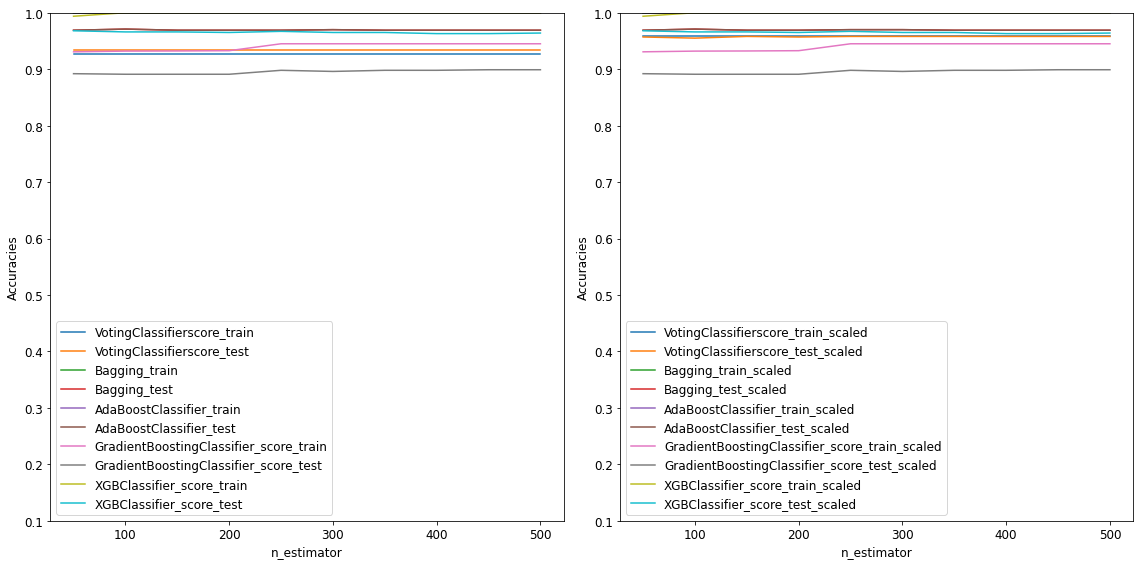

Plots of Accuracies With Random_states


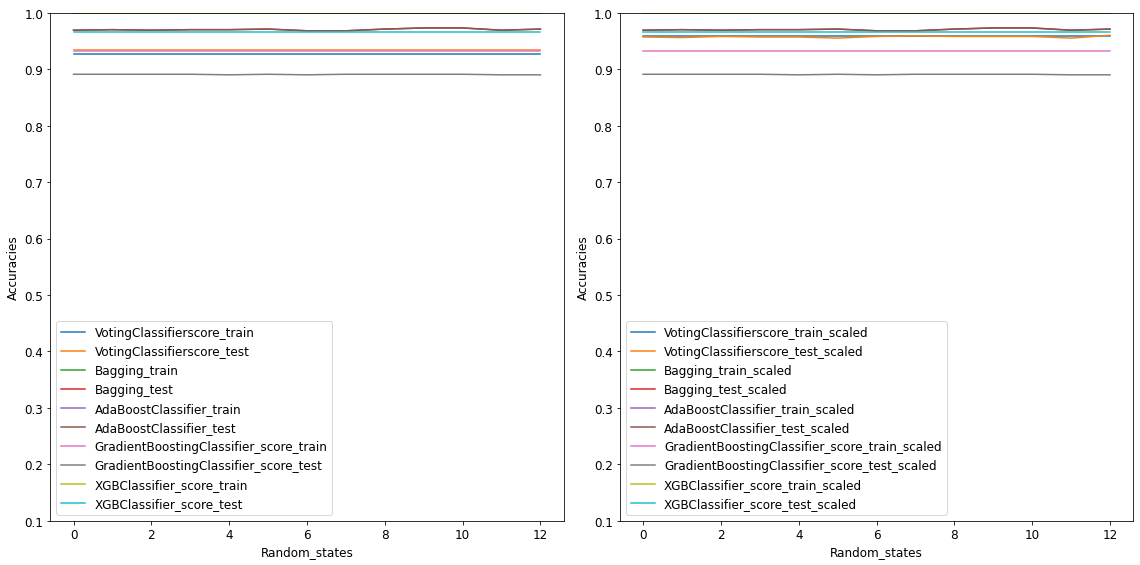

Plots of Accuracies With Learning_rate


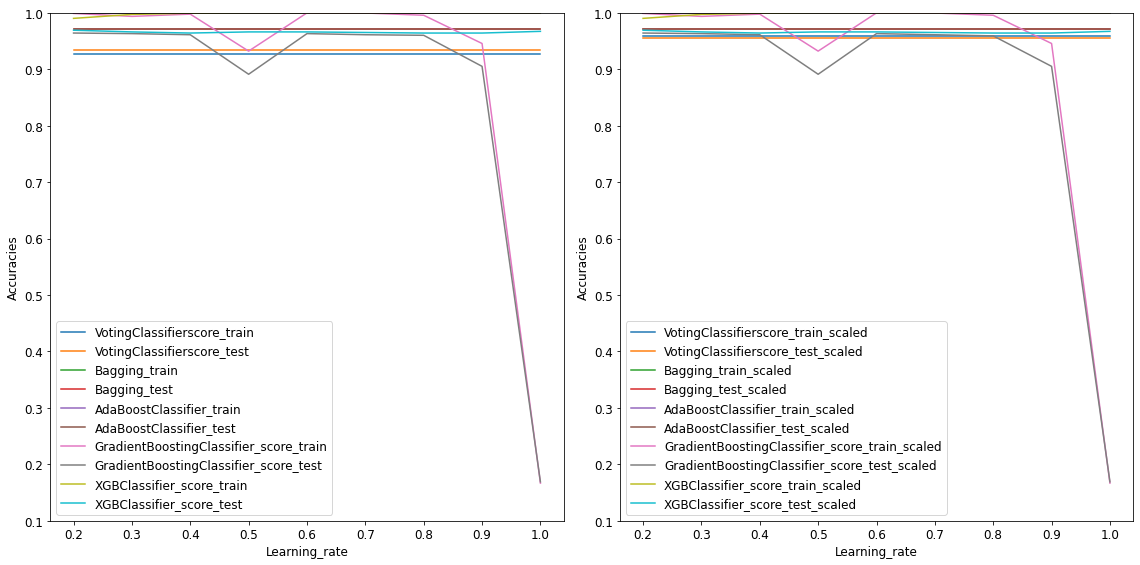

In [25]:
def Plot_Accuracies_Ensemble(Accuracies_Variation_Data, Variable_x, title):
    """ 
    Plot_Accuracies_Ensemble: is a function that acceptes data and returns two plots
    of the data
    """
    Accuracies_0 = np.array(Accuracies_Variation_Data).T
    Legends = ["VotingClassifierscore_train", "VotingClassifierscore_test", "Bagging_train", "Bagging_test", "AdaBoostClassifier_train", "AdaBoostClassifier_test",\
  "GradientBoostingClassifier_score_train",  "GradientBoostingClassifier_score_test", "XGBClassifier_score_train", "XGBClassifier_score_test", \
  "VotingClassifierscore_train_scaled", "VotingClassifierscore_test_scaled", "Bagging_train_scaled", "Bagging_test_scaled", "AdaBoostClassifier_train_scaled", "AdaBoostClassifier_test_scaled",\
  "GradientBoostingClassifier_score_train_scaled", "GradientBoostingClassifier_score_test_scaled" ,  "XGBClassifier_score_train_scaled", "XGBClassifier_score_test_scaled" ]
    fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(16, 8)) # define the figure and subplots
    for i in range(2):
        for k in range(10):
            ax[i].plot(Variable_x, Accuracies_0[i*10 + k], label = Legends[i*10 + k])
        ax[i].legend()
        ax[i].set_xlabel(title[1])
        ax[i].set_ylabel(title[2])
        ax[i].set_ylim([0.1, 1])
    plt.rcParams['font.size'] = '12' # Set general font size
    plt.suptitle(title[0])
    #plt.ylim([-0.1, 1])
    fig.tight_layout()
    plt.show()
        
import time
begin_time = time.time()

#title_0 = ['Plots of Accuracies With_n_estimator','n_estimator','Accuracies']
#title_1 = ['Plots of Accuracies With Random_states','Random_states','Accuracies']
#title_2 = ['Plots of Accuracies With Learning_rate','Learning_rate','Accuracies']

title_0 = [' ','n_estimator','Accuracies']
title_1 = [' ','Random_states','Accuracies']
title_2 = [' ','Learning_rate','Accuracies']

print('Plots of Accuracies With_n_estimator')
Plot_Accuracies_Ensemble(tr1,np.array(tr2)*50, title_0)

print('Plots of Accuracies With Random_states')
Plot_Accuracies_Ensemble(tr3,tr4, title_1)

print('Plots of Accuracies With Learning_rate')
Plot_Accuracies_Ensemble(tr5,np.array(tr6)*0.1, title_2)